<a href="https://colab.research.google.com/github/aritradey-CS/Admission-Prediction/blob/master/Nov_23_Update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Manually specify the correlation matrix and then generate data that adheres to this correlation structure.This code will generate a CSV file, custom_data_correlated.csv, with data that follows the specified correlation structure. We can adjust the scale and mean values for each column to meet our specific requirements.

In [ ]:
import pandas as pd
import numpy as np

# Define the covariance matrix to achieve the desired correlations
covariance_matrix = np.array([
    [1.0, 0.7, 0.6, 0.3, 0.4, 0.8, 0.5, 0.9],
    [0.6, 1.0, 0.5, 0.2, 0.3, 0.7, 0.3, 0.8],
    [0.3, 0.5, 1.0, 0.4, 0.6, 0.9, 0.4, 0.7],
    [0.5, 0.2, 0.4, 1.0, 0.2, 0.5, 0.2, 0.4],
    [0.2, 0.3, 0.6, 0.2, 1.0, 0.7, 0.3, 0.6],
    [0.7, 0.6, 0.9, 0.5, 0.7, 1.0, 0.6, 0.9],
    [0.5, 0.3, 0.4, 0.2, 0.3, 0.6, 1.0, 0.5],
    [0.9, 0.7, 0.7, 0.6, 0.6, 0.9, 0.5, 1.0]
])

# Generate data with the specified covariance matrix
data = np.random.multivariate_normal(mean=[0] * 8, cov=covariance_matrix, size=2000)

# Create a DataFrame
df = pd.DataFrame(data, columns=[
    'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit'
])

# Adjust the scale and mean as needed for each column
# You may need to adjust the scale and mean to match your specific requirements

# Scale and mean values
scale = [20, 10, 5, 12, 17, 1, 0.5, 0.2]
mean = [320, 100, 3, 3, 3, 3, 0.5, 0.75]

for i, col in enumerate(df.columns):
    df[col] = df[col] * scale[i] + mean[i]

# Save the DataFrame to a CSV file
df.to_csv('custom_data_correlated.csv', index=False)

print("Custom CSV file 'custom_data_correlated.csv' has been created and saved.")


Custom CSV file 'custom_data_correlated.csv' has been created and saved.


<ipython-input-1-c6f8e9ce0312>:17: RuntimeWarning: covariance is not positive-semidefinite.
  data = np.random.multivariate_normal(mean=[0] * 8, cov=covariance_matrix, size=2000)


I used a different correlation matrix with arbitrary values, and can adjust the scale and mean as needed to match your specific requirements. The generated data will follow the new correlation structure and scale adjustments.

                   GRE Score  TOEFL Score  University Rating       SOP  \
GRE Score           1.000000     0.568943           0.451088  0.440772   
TOEFL Score         0.568943     1.000000           0.512849  0.203911   
University Rating   0.451088     0.512849           1.000000  0.451529   
SOP                 0.440772     0.203911           0.451529  1.000000   
LOR                 0.296524     0.322530           0.605181  0.275961   
CGPA                0.663808     0.683314           0.911328  0.517921   
Research            0.500745     0.318648           0.455211  0.209346   
Chance of Admit     0.797605     0.782887           0.757091  0.425032   

                        LOR      CGPA  Research  Chance of Admit  
GRE Score          0.296524  0.663808  0.500745         0.797605  
TOEFL Score        0.322530  0.683314  0.318648         0.782887  
University Rating  0.605181  0.911328  0.455211         0.757091  
SOP                0.275961  0.517921  0.209346         0.425032 

<Axes: >

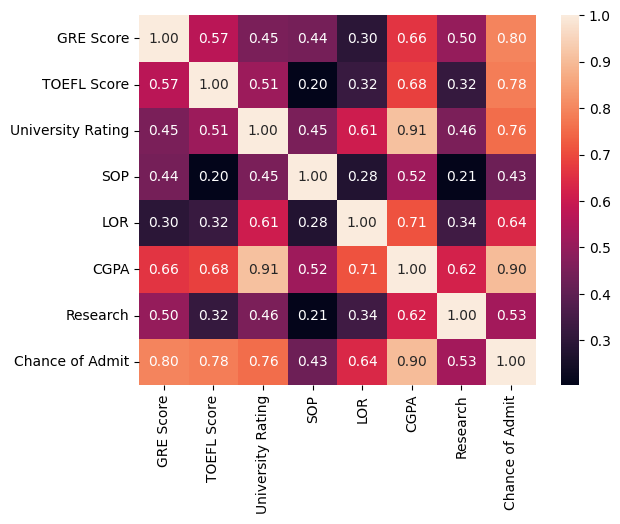

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

# Load the dataset from the CSV file
df = pd.read_csv('custom_data_correlated.csv')
df.head(10)

# Assigning the list of columns from the dataset
numericColumns = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit']

# Creating a correlation matrix
correlationMatrix = df.loc[:, numericColumns].corr()

# Printing the correlation matrix
print(correlationMatrix)

# Displaying the correlation matrix with two decimal places
sns.heatmap(correlationMatrix, annot=True, fmt='.2f')  # Use fmt='.2f' to display two decimal places


1.  Loads a dataset from a CSV file named  
    'custom_data_correlated.csv' using Pandas and displays the first 10 rows of the dataset.

2.  Defines a list of numeric column names to work with.

3.  Calculates a correlation matrix for the specified
    numeric columns. The correlation matrix shows how each numeric column is related to every other numeric column in the dataset.

4.  Prints the correlation matrix to the console, showing
    the pairwise correlations between the columns.

5.  Displays the correlation matrix as a heatmap using
    Seaborn. The sns.heatmap function is used to create the heatmap, and the annot=True parameter adds the correlation values to each cell of the heatmap. The fmt='.2f' parameter is used to format the values to display two decimal places in the heatmap.

In summary, this code loads a dataset, calculates and prints the correlation matrix, and then visualizes the correlation matrix as a heatmap with correlation values rounded to two decimal places. This can be helpful for understanding the relationships between the features in the dataset.




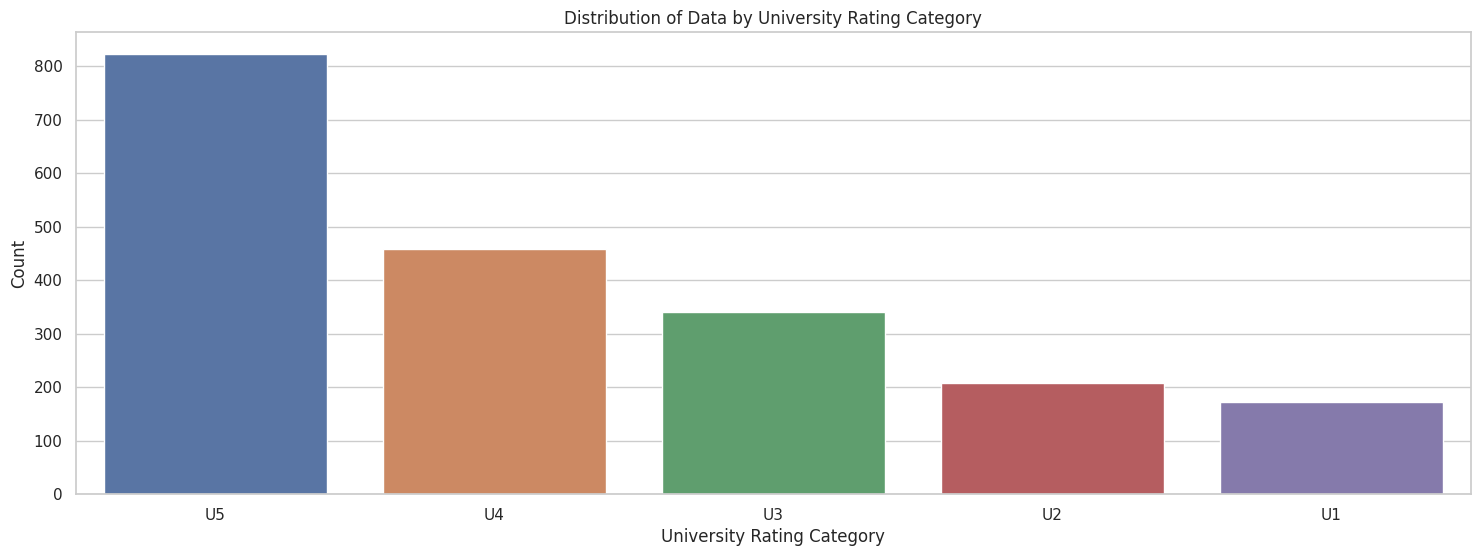

U5: 822 students
U4: 458 students
U3: 341 students
U2: 207 students
U1: 172 students


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from the CSV file
df = pd.read_csv('custom_data_correlated.csv')

# Define cutoffs for University Rating categories
cutoffs = [df['University Rating'].min() - 1.1, 2.0, 5.0, 7.5, 10.0, df['University Rating'].max() + 0.1]


# Create a new column 'University Rating Category' based on cutoffs
df['University Rating Category'] = pd.cut(df['University Rating'], bins=cutoffs, labels=['U5', 'U4', 'U3', 'U2', 'U1'])

# Count the number of data points in each category
category_counts = df['University Rating Category'].value_counts().sort_index()

# Create a bar plot to visualize the distribution of data by University Rating
plt.figure(figsize=(18, 6))
sns.set(style="whitegrid")
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Distribution of Data by University Rating Category')
plt.xlabel('University Rating Category')
plt.ylabel('Count')
plt.show()

# Print the count of students in each subgroup
for category, count in zip(category_counts.index, category_counts.values):
    print(f"{category}: {count} students")


The provided code loads a dataset from a CSV file and performs the following tasks:

1. It categorizes the "University Rating" feature into five categories (U5, U4, U3, U2, U1) based on specified cutoff values.
2. It counts the number of data points in each category.
3. It creates a bar plot to visualize the distribution of data across these University Rating categories.
4. It prints the count of students in each of the five categories.

This code is used to explore and visualize how the data is distributed among different University Rating categories.

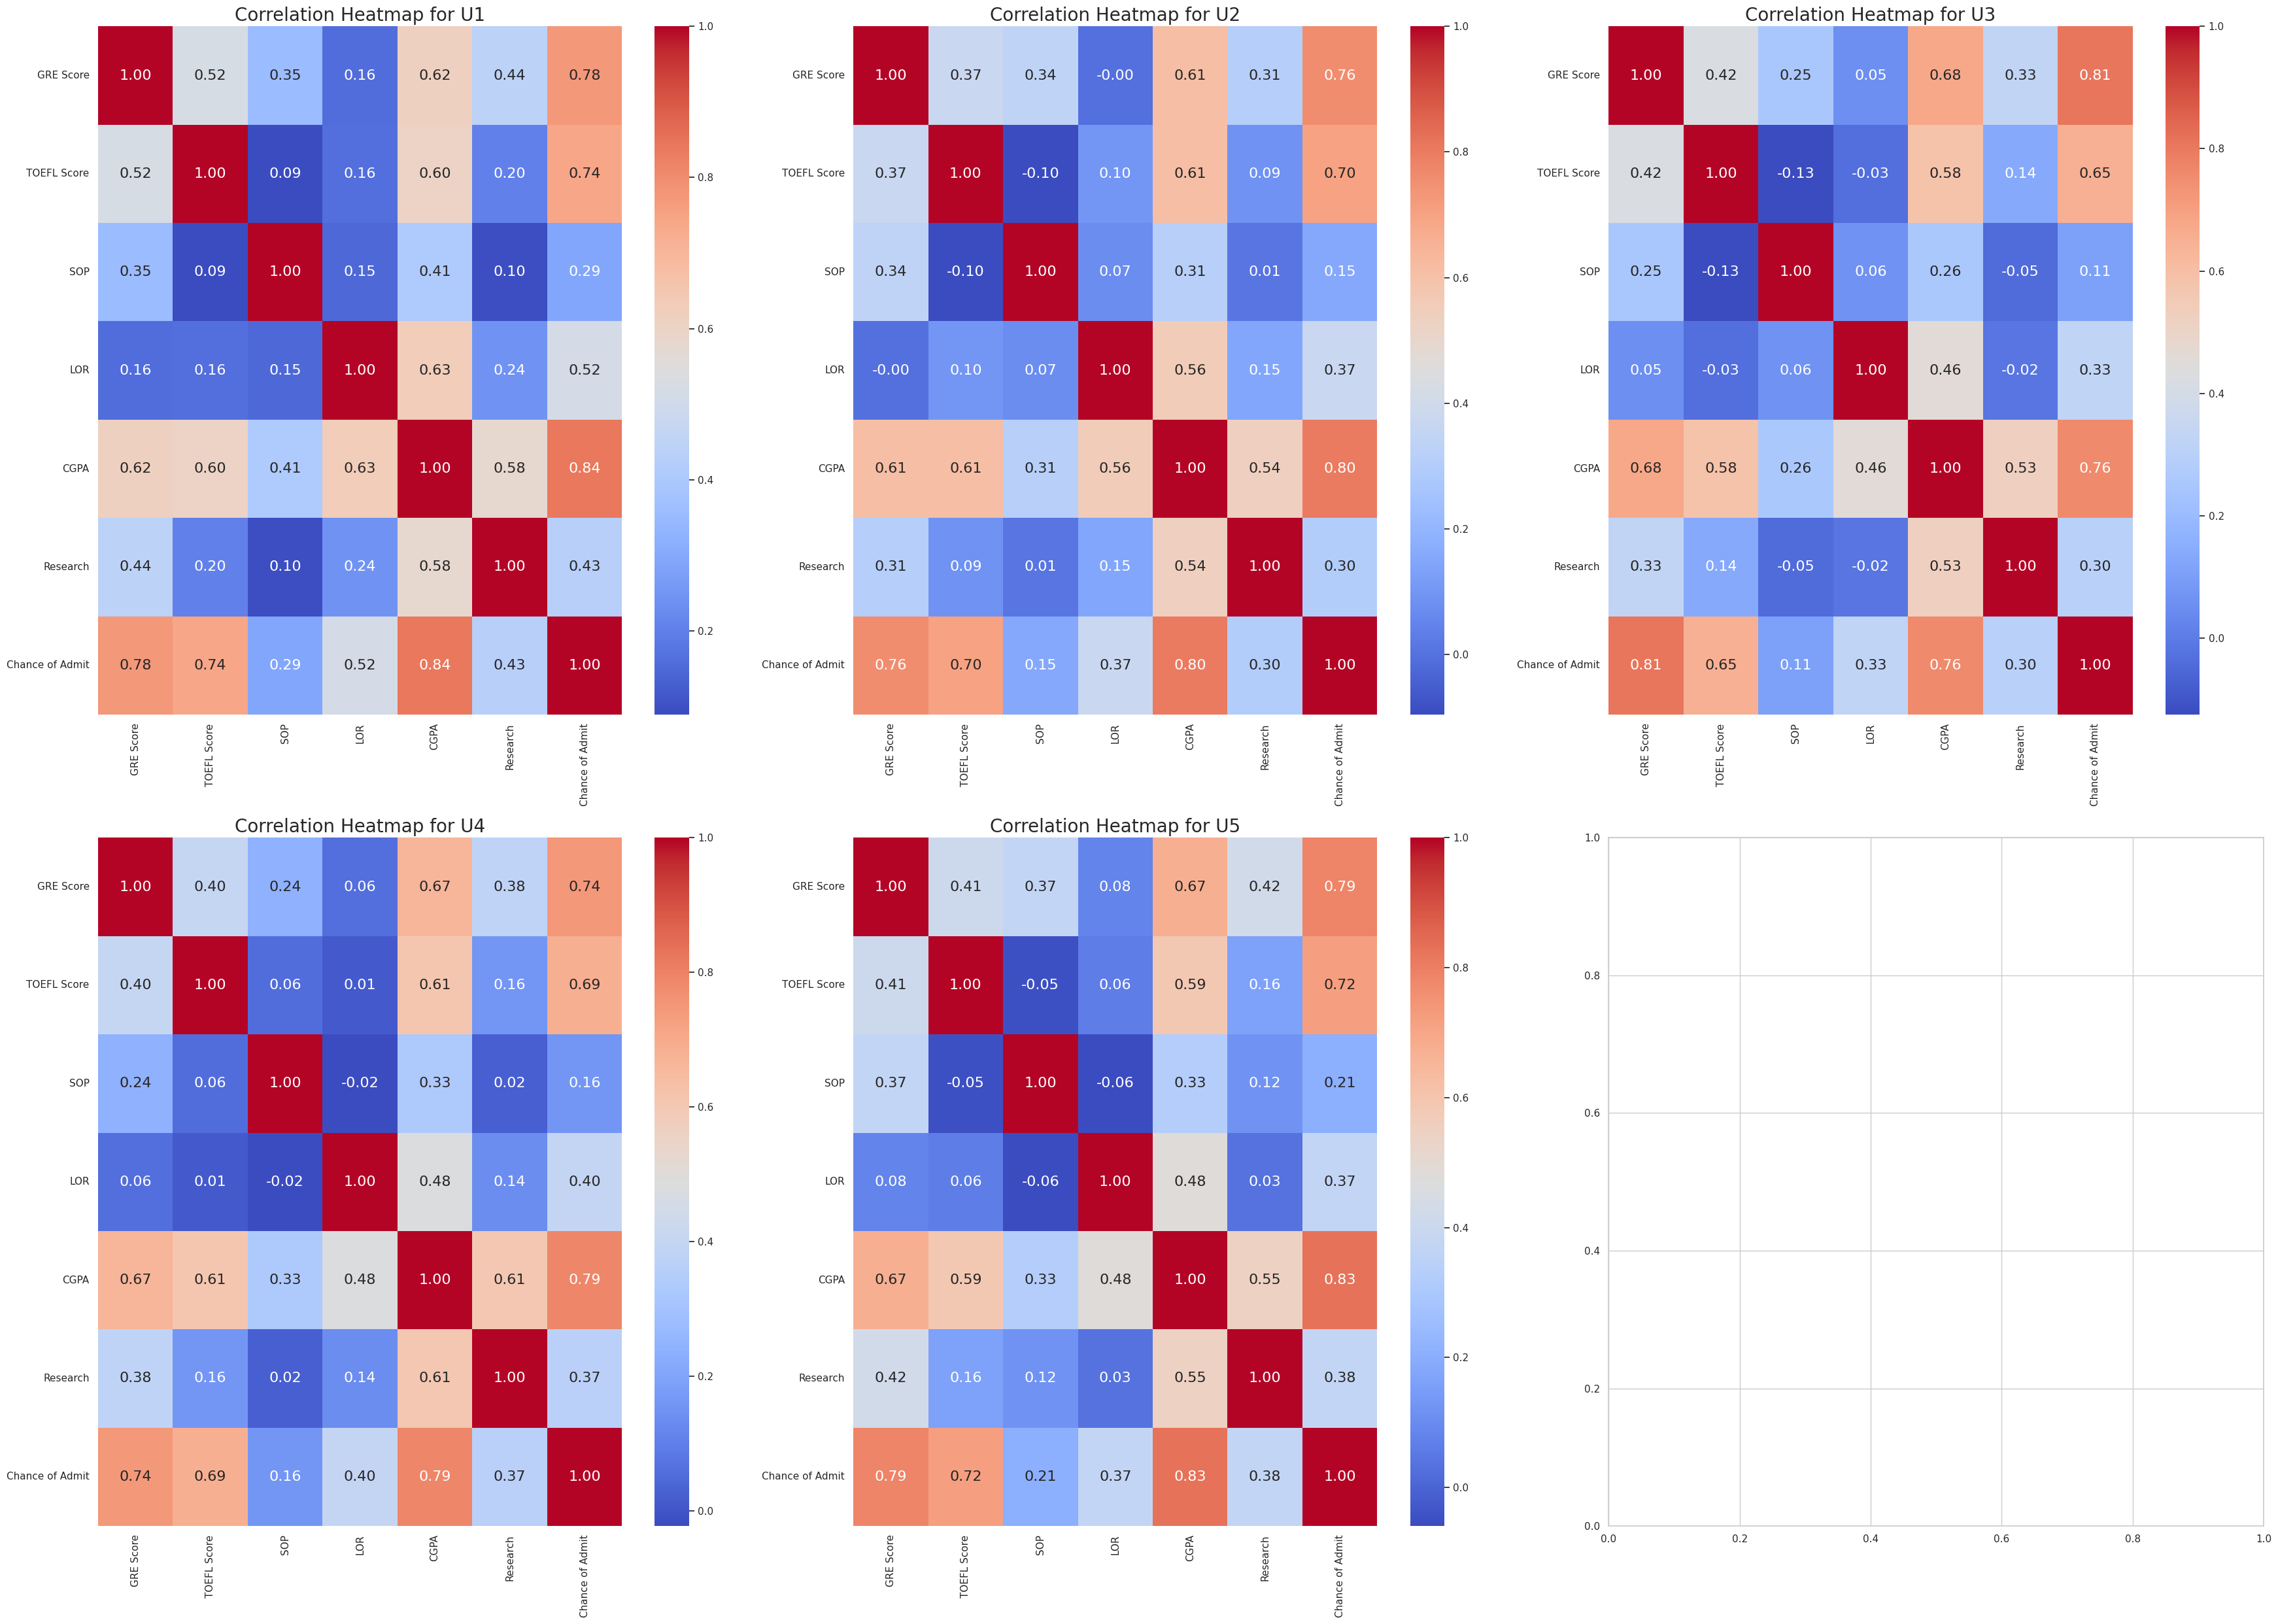

U1: Most related feature to 'Chance of Admit' is 'CGPA'
U2: Most related feature to 'Chance of Admit' is 'CGPA'
U3: Most related feature to 'Chance of Admit' is 'GRE Score'
U4: Most related feature to 'Chance of Admit' is 'CGPA'
U5: Most related feature to 'Chance of Admit' is 'CGPA'
Category: U1, Model: Linear Regression
Mean Squared Error (MSE): 0.008423634973903069
R-squared (R2): 0.7334738317871312


Category: U1, Model: Decision Tree Regression
Mean Squared Error (MSE): 0.016692720689952277
R-squared (R2): 0.47183764534858474


Category: U1, Model: Random Forest Regression
Mean Squared Error (MSE): 0.01219411256430421
R-squared (R2): 0.6141748655314181


Category: U2, Model: Linear Regression
Mean Squared Error (MSE): 0.005889151539470099
R-squared (R2): 0.6294835353822279


Category: U2, Model: Decision Tree Regression
Mean Squared Error (MSE): 0.012242386643515492
R-squared (R2): 0.2297692142513048


Category: U2, Model: Random Forest Regression
Mean Squared Error (MSE): 0.00893

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
try:
    df = pd.read_csv('custom_data_correlated.csv')
except FileNotFoundError:
    print("Dataset file not found. Please check the file path.")
    exit(1)

# Define the cutoffs for University Rating categories
cutoffs = [df['University Rating'].min() - 9.1, 4.5, 6.0, 7.5, 9.0, df['University Rating'].max() + 0.1]

# Create a new column 'University Rating Category' based on cutoffs
df['University Rating Category'] = pd.cut(df['University Rating'], bins=cutoffs, labels=['U1', 'U2', 'U3', 'U4', 'U5'])

# Define a list of features you want to consider for selection
features_to_consider = ['GRE Score', 'TOEFL Score', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit']

# Initialize a dictionary to store the most related feature for each category
most_related_features = {}

# Create subplots for subgroups (maximum 3 per row)
num_subgroups = len(df['University Rating Category'].cat.categories)
num_cols = min(num_subgroups, 3)
num_rows = int(np.ceil(num_subgroups / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(35, 25))
fig.subplots_adjust(wspace=1.4, hspace=1.4)

# Set the font size for annotations
annot_font_size = 16  # Adjust the font size as needed

for i, category in enumerate(df['University Rating Category'].cat.categories):
    row = i // num_cols
    col = i % num_cols

    # Select the data for the current category
    category_data = df[df['University Rating Category'] == category]

    # Calculate correlations within the current category
    correlation_matrix = category_data[features_to_consider].corr()

    try:
        # Find the feature most related to "Chance of Admit" (maximum correlation)
        most_related_feature = correlation_matrix['Chance of Admit'].sort_values(ascending=False).index[1]
    except IndexError:
        print(f"No valid features found for category {category}. Skipping.")
        continue

    # Store the most related feature in the dictionary
    most_related_features[category] = most_related_feature

    # Create a heatmap for visualization with increased font size for annotations
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[row, col],
                annot_kws={"size": annot_font_size})
    axes[row, col].set_title(f'Correlation Heatmap for {category}', fontsize=20)

# Show the subplots
plt.tight_layout()
plt.show()

# Display the most related features for each category
for category, feature in most_related_features.items():
    print(f"{category}: Most related feature to 'Chance of Admit' is '{feature}'")

# Initialize a dictionary to store trained models
trained_models = {}

# Define the common splitting ratio
test_size = 0.3

# Iterate through each 'University Rating Category'
for category, feature in most_related_features.items():
    # Select the data for the current category
    category_data = df[df['University Rating Category'] == category]

    # Features and target variable
    X = category_data[[feature]]
    y = category_data['Chance of Admit']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Initialize and train different machine learning models
    models = [
        ("Linear Regression", LinearRegression()),
        ("Decision Tree Regression", DecisionTreeRegressor()),
        ("Random Forest Regression", RandomForestRegressor())
    ]

    for model_name, model in models:
        try:
            model.fit(X_train, y_train)
        except Exception as e:
            print(f"Error while training {model_name} for category {category}: {e}")
            continue

        trained_models[(category, model_name)] = model

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Evaluate the model's performance
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Display the model's performance metrics
        print(f"Category: {category}, Model: {model_name}")
        print(f"Mean Squared Error (MSE): {mse}")
        print(f"R-squared (R2): {r2}")
        print("\n")

# Now you have trained and evaluated three different models for each category.


The above code does the following:

1. Sets the font size for various elements in the plot, such as X-axis labels, Y-axis labels, axis titles, and figure titles.

2. Loads a dataset from a CSV file ('custom_data_correlated.csv').

3. Defines cutoffs for University Rating categories based on the dataset.

4. Creates a new column 'University Rating Category' in the DataFrame based on the cutoffs.

5. Defines a list of features to consider for analysis.

6. Initializes a dictionary to store the most related feature for each category.

7. Sets up subplots for different subgroups (maximum 3 per row) and adjusts spacing between them.

8. Sets the font size for annotations within the correlation heatmaps.

9. Iterates through each University Rating category, selects the data for the category, calculates correlations within that category, and finds the most related feature to "Chance of Admit."

10. Creates a heatmap for visualization with annotations, where the font size for annotations is increased.

11. Displays the subplots, and prints the most related features for each category.

This code generates correlation heatmaps for different University Rating categories and highlights the most related feature to "Chance of Admit" for each category. It also customizes font sizes to improve readability in the plots.

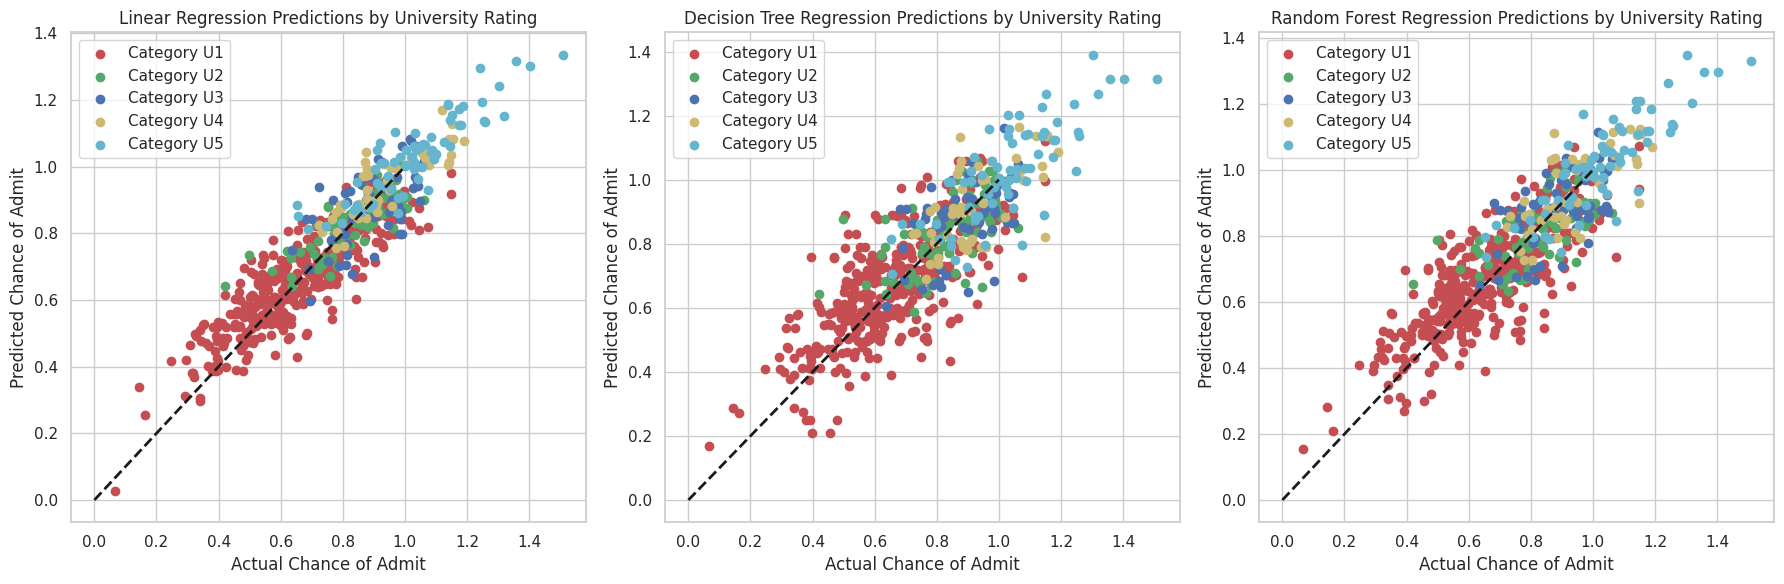

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize a dictionary for colors for different categories
category_colors = {'U1': 'r', 'U2': 'g', 'U3': 'b', 'U4': 'y', 'U5': 'c'}

# Create subplots for the three models
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Iterate through models
for i, model_name in enumerate(["Linear Regression", "Decision Tree Regression", "Random Forest Regression"]):
    ax = axes[i]
    ax.set_title(f'{model_name} Predictions by University Rating')

    # Iterate through categories
    for category in df['University Rating Category'].cat.categories:
        category_data = df[df['University Rating Category'] == category]

        X = category_data[[most_related_features[category]]]
        y = category_data['Chance of Admit']

        # Split data into training and testing
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

        model = trained_models[(category, model_name)]
        y_pred = model.predict(X_test)

        ax.scatter(y_test, y_pred, c=category_colors[category], label=f'Category {category}')

    ax.plot([0, 1], [0, 1], 'k--', lw=2)  # 45-degree reference line
    ax.set_xlabel('Actual Chance of Admit')
    ax.set_ylabel('Predicted Chance of Admit')
    ax.legend()

plt.tight_layout()
plt.show()

This code generates a set of three plots for different machine learning models and their performance in predicting "Chance of Admit" based on "University Rating" categories. Here are the key points and results:

1. **Visualization:** It creates subplots for three machine learning models: Linear Regression, Decision Tree Regression, and Random Forest Regression.

2. **Color-Coded Categories:** The points in the plots are color-coded for five university rating categories (U1, U2, U3, U4, U5) using different colors (red, green, blue, yellow, cyan).

3. **Data Iteration:** The code iterates through the selected machine learning models and the university rating categories.

4. **Model Predictions:** For each model and category, it uses trained machine learning models to predict "Chance of Admit" based on the most relevant feature for that category.

5. **Scatter Plots:** Scatter plots are created for each model, showing the relationship between actual and predicted "Chance of Admit" for each category.

6. **Reference Line:** A reference line at a 45-degree angle (y = x) is added to indicate perfect predictions.

7. **Axes and Legends:** Axes labels, legends, and titles are included to make the plots informative.

8. **Layout:** The subplots are organized in a tight layout within a single figure.

9. **Final Display:** The code displays the generated plots, allowing easy visual comparison of model performance for different university rating categories.

Overall, this code helps analyze and visualize how well the selected machine learning models perform in predicting admission chances across various university rating categories, providing insights into their predictive capabilities.

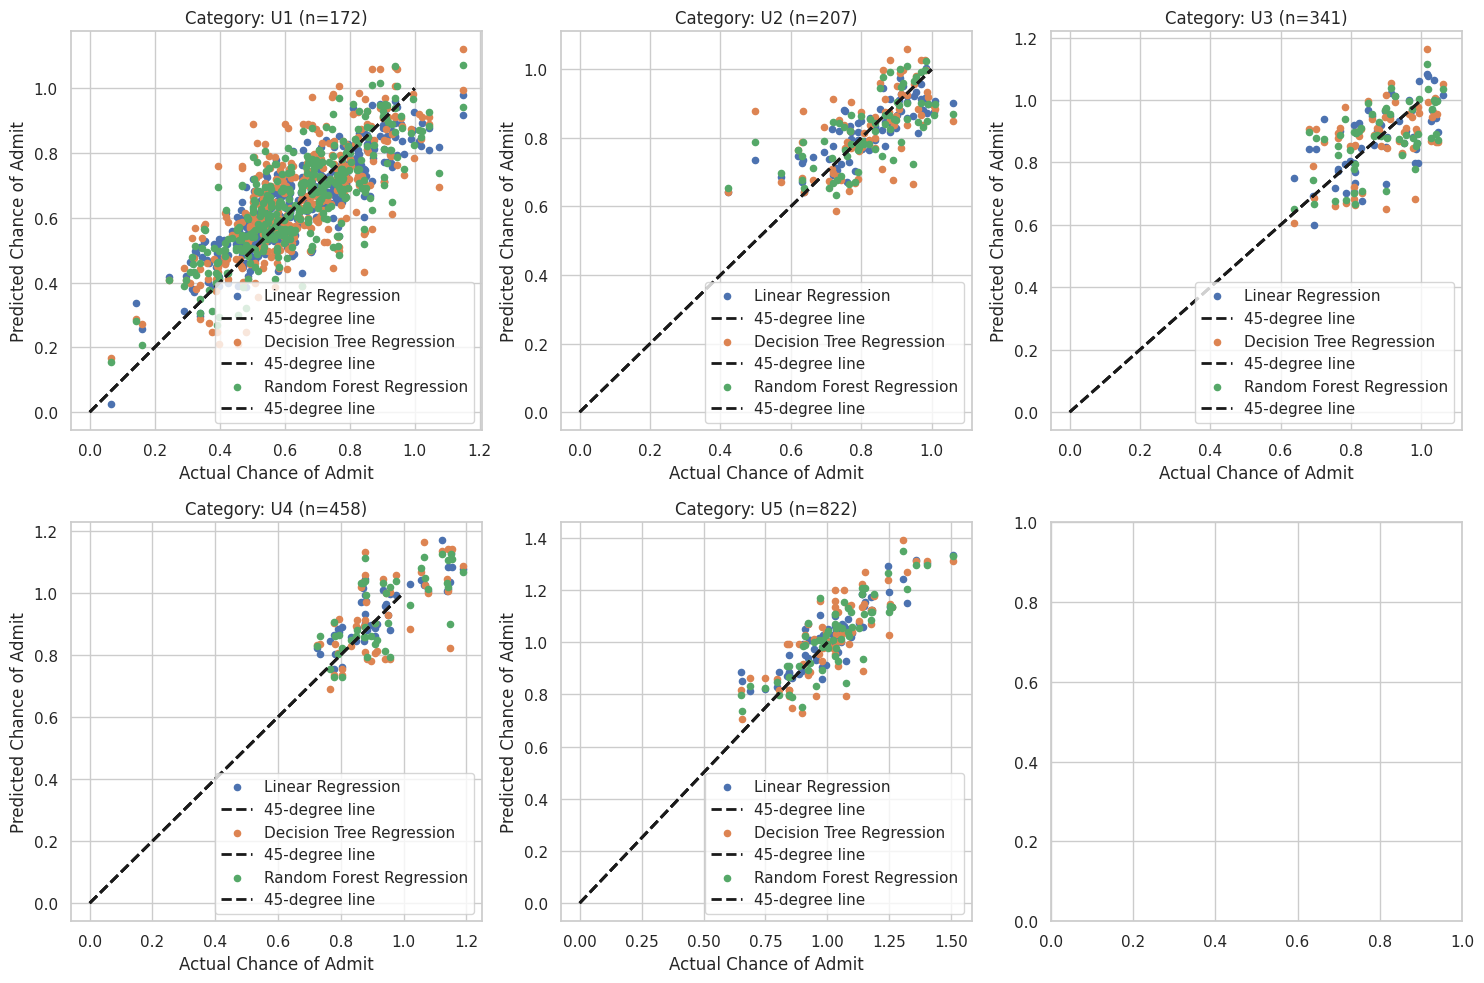

Model: Linear Regression, Mean Squared Error (MSE): 0.0084, R-squared (R2): 0.7335
Model: Decision Tree Regression, Mean Squared Error (MSE): 0.0167, R-squared (R2): 0.4718
Model: Random Forest Regression, Mean Squared Error (MSE): 0.0122, R-squared (R2): 0.6142
Model: Linear Regression, Mean Squared Error (MSE): 0.0059, R-squared (R2): 0.6295
Model: Decision Tree Regression, Mean Squared Error (MSE): 0.0122, R-squared (R2): 0.2298
Model: Random Forest Regression, Mean Squared Error (MSE): 0.0089, R-squared (R2): 0.4378
Model: Linear Regression, Mean Squared Error (MSE): 0.0089, R-squared (R2): 0.2690
Model: Decision Tree Regression, Mean Squared Error (MSE): 0.0130, R-squared (R2): -0.0620
Model: Random Forest Regression, Mean Squared Error (MSE): 0.0101, R-squared (R2): 0.1709
Model: Linear Regression, Mean Squared Error (MSE): 0.0052, R-squared (R2): 0.6885
Model: Decision Tree Regression, Mean Squared Error (MSE): 0.0117, R-squared (R2): 0.2973
Model: Random Forest Regression, Mean

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Create subplots for each University Rating category
num_subgroups = len(df['University Rating Category'].cat.categories)
num_cols = min(num_subgroups, 3)
num_rows = np.ceil(num_subgroups / num_cols).astype(int)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
fig.subplots_adjust(wspace=0.4, hspace=0.4)

# Initialize dictionaries to store model performances
mse_dict = {}
r2_dict = {}

# Define the distribution of students in each category
students_distribution = {'U5': 822, 'U4': 458, 'U3': 341, 'U2': 207, 'U1': 172}

for i, category in enumerate(df['University Rating Category'].cat.categories):
    row = i // num_cols
    col = i % num_cols

    # Select the data for the current category
    category_data = df[df['University Rating Category'] == category]
    X = category_data[[most_related_features[category]]]
    y = category_data['Chance of Admit']

    # Count the number of students in this category
    num_students = students_distribution[category]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Iterate through the models and evaluate their performance
    for model_name, model in trained_models.items():
        if model_name[0] == category:
            y_pred = model.predict(X_test)

            # Calculate performance metrics
            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)

            # Store the metrics in dictionaries
            if model_name not in mse_dict:
                mse_dict[model_name] = []
                r2_dict[model_name] = []
            mse_dict[model_name].append(mse)
            r2_dict[model_name].append(r2)

            # Plot the actual vs. predicted values
            axes[row, col].scatter(y_test, y_pred, s=20, label=model_name[1])

            # Add the 45-degree reference line
            axes[row, col].plot([0, 1], [0, 1], 'k--', lw=2, label='45-degree line')

            axes[row, col].set_title(f'Category: {category} (n={num_students})')
            axes[row, col].set_xlabel('Actual Chance of Admit')
            axes[row, col].set_ylabel('Predicted Chance of Admit')

            # Add a legend to the plot
            axes[row, col].legend()

# Show the subplots
plt.tight_layout()
plt.show()

# Print performance metrics
for model_name in mse_dict:
    print(f"Model: {model_name[1]}, Mean Squared Error (MSE): {np.mean(mse_dict[model_name]):.4f}, "
          f"R-squared (R2): {np.mean(r2_dict[model_name]):.4f}")

# Compare model performance within each category
for category in df['University Rating Category'].cat.categories:
    print(f"\nCategory: {category}")
    mse_values = [mse_dict[model_name] for model_name in mse_dict if model_name[0] == category]
    r2_values = [r2_dict[model_name] for model_name in r2_dict if model_name[0] == category]

    best_model_index = mse_values.index(min(mse_values))
    worst_model_index = mse_values.index(max(mse_values))

    best_model_name = list(mse_dict.keys())[best_model_index][1]
    worst_model_name = list(mse_dict.keys())[worst_model_index][1]

    best_mse = mse_values[best_model_index]
    best_r2 = r2_values[best_model_index]

    worst_mse = mse_values[worst_model_index]
    worst_r2 = r2_values[worst_model_index]

    print(f"Best Model: {best_model_name}, Mean Squared Error (MSE): {np.mean(best_mse):.4f}, R-squared (R2): {np.mean(best_r2):.4f}")
    print(f"Worst Model: {worst_model_name}, Mean Squared Error (MSE): {np.mean(worst_mse):.4f}, R-squared (R2): {np.mean(worst_r2):.4f}")


The code creates a set of subplots, each representing a different category of university rating. It assesses the performance of machine learning models by comparing their predictions of student admissions against actual data. A 45-degree reference line is included in each plot for comparison. The models' performance metrics, including Mean Squared Error (MSE) and R-squared (R2), are calculated and compared within each category, highlighting the best and worst-performing models. The code provides a comprehensive visualization and analysis of how well the models predict student admissions for different university rating categories.

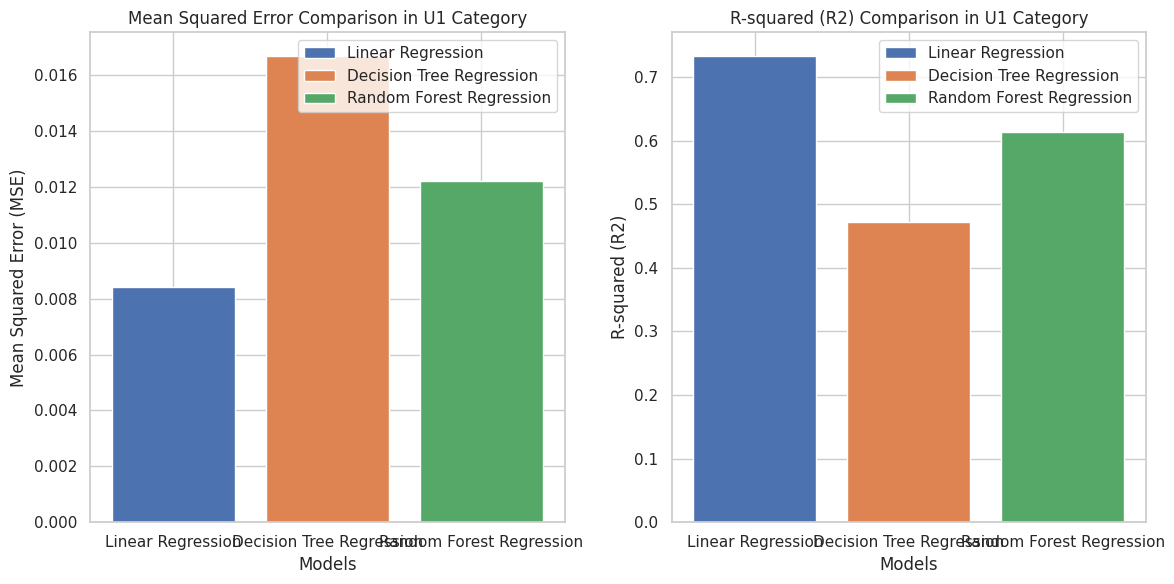

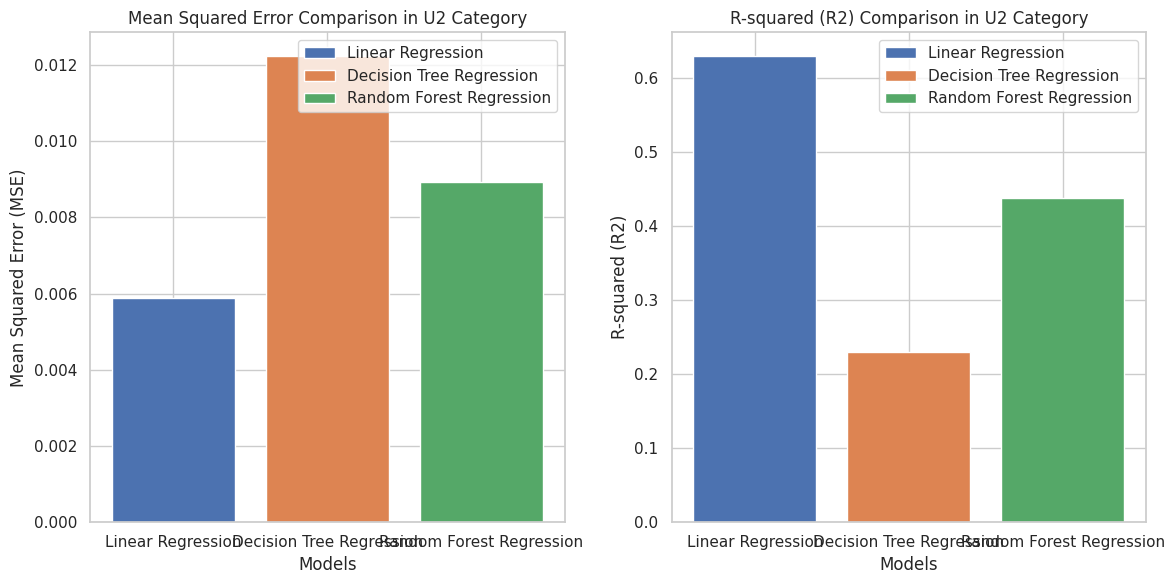

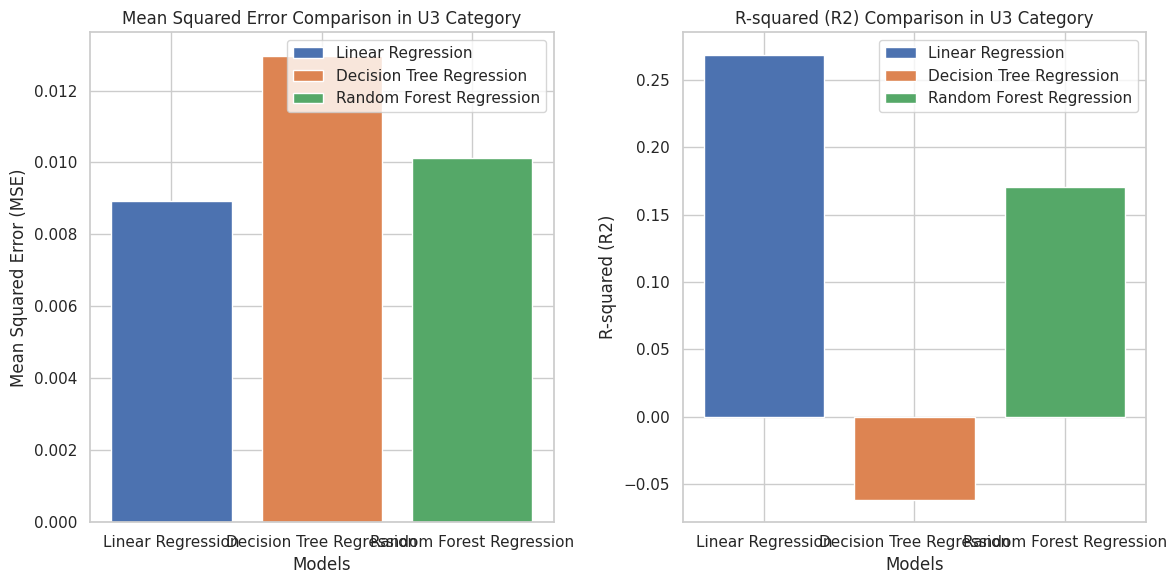

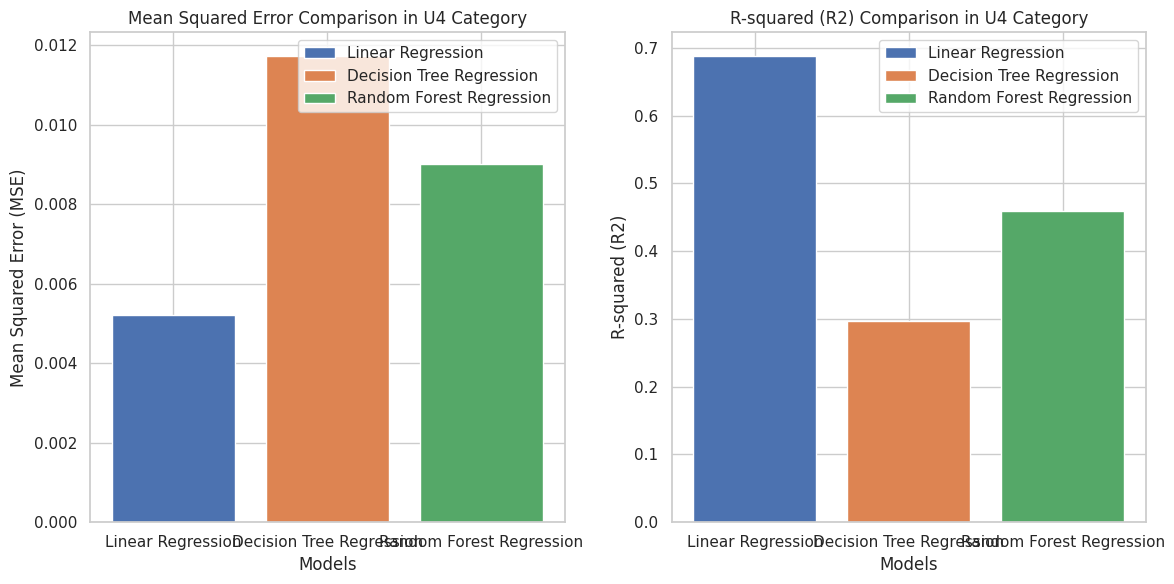

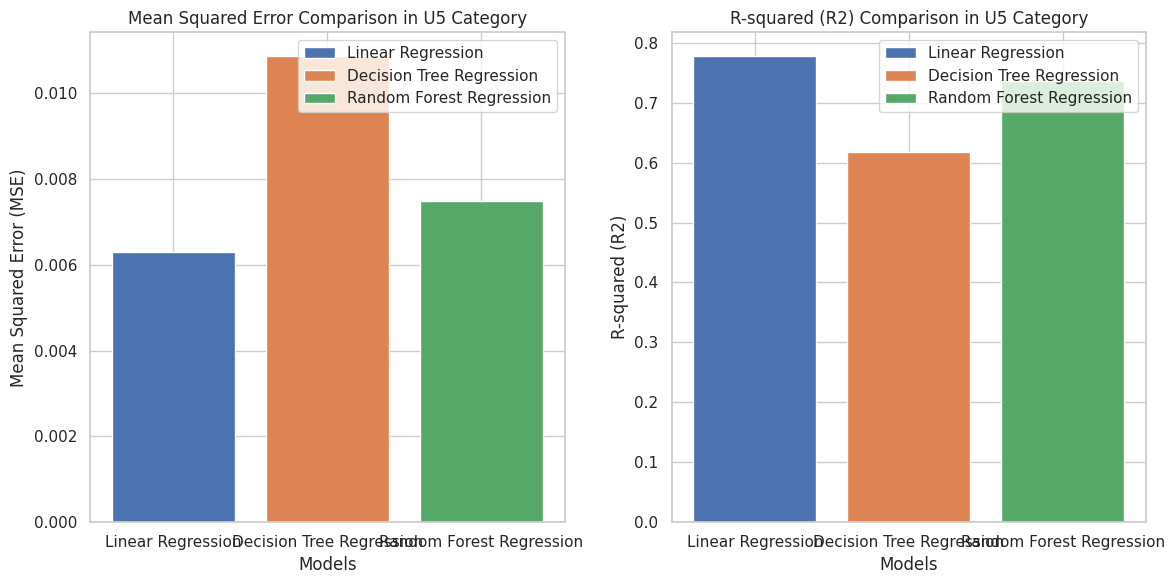

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate mse_dict and r2_dict using your previous code

# Create bar plots for MSE and R2 comparisons for each category
for category in df['University Rating Category'].cat.categories:
    plt.figure(figsize=(12, 6))

    # Mean Squared Error (MSE) Comparison
    plt.subplot(1, 2, 1)
    for model_name in mse_dict:
        mse_values = mse_dict[model_name]
        if model_name[0] == category:
            plt.bar(model_name[1], np.mean(mse_values), label=model_name[1])
    plt.title(f'Mean Squared Error Comparison in {category} Category')
    plt.xlabel('Models')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.legend()

    # R-squared (R2) Comparison
    plt.subplot(1, 2, 2)
    for model_name in r2_dict:
        r2_values = r2_dict[model_name]
        if model_name[0] == category:
            plt.bar(model_name[1], np.mean(r2_values), label=model_name[1])
    plt.title(f'R-squared (R2) Comparison in {category} Category')
    plt.xlabel('Models')
    plt.ylabel('R-squared (R2)')
    plt.legend()

    plt.tight_layout()
    plt.show()


The code generates a set of bar plots for Mean Squared Error (MSE) and R-squared (R2) comparisons for different categories of university ratings. For each category, it displays separate plots that compare various machine learning models. In the MSE comparison plot, lower values indicate better model performance. In the R2 comparison plot, values close to 1 suggest better model performance. The code helps visualize how different models perform across different university rating categories, making it easy to identify which models excel or struggle in specific categories.

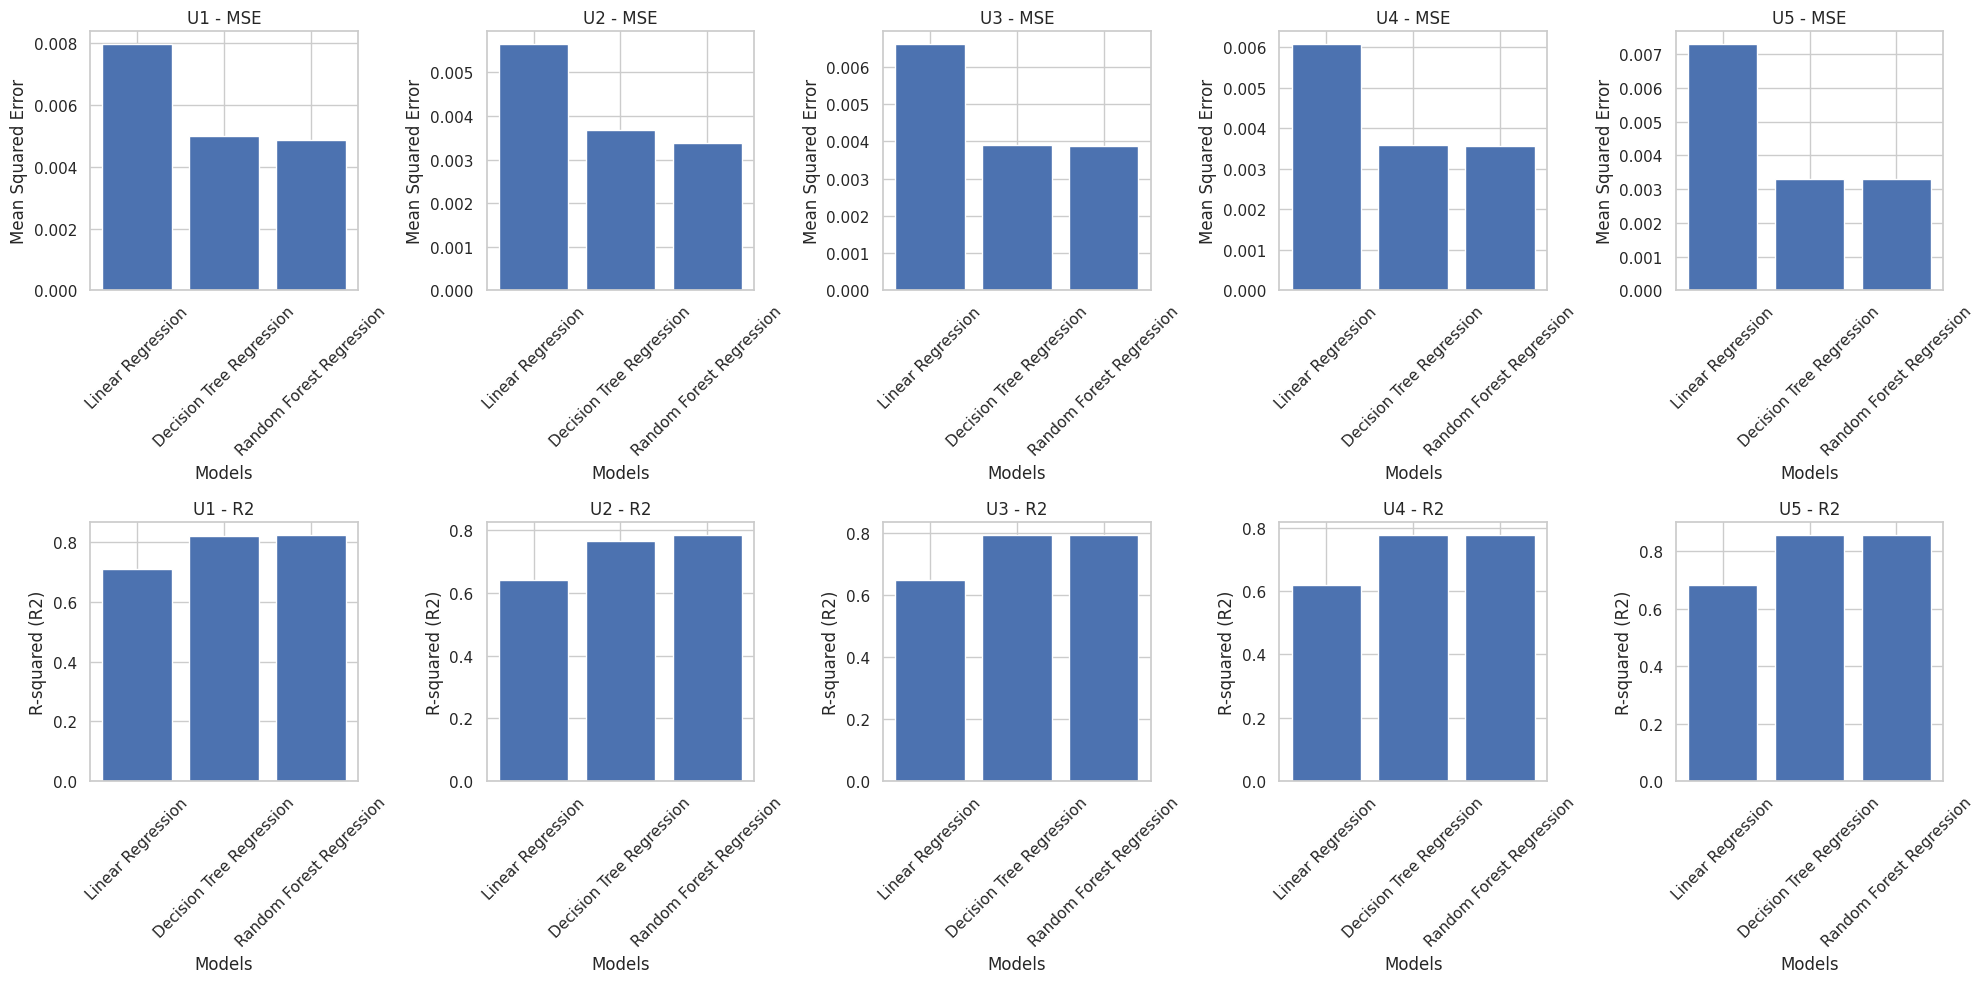

Empty DataFrame
Columns: []
Index: [U1, U2, U3, U4, U5]
University Category: U1
Best Model (MSE): Random Forest Regression
Worst Model (MSE): Linear Regression
Best Model (R2): Random Forest Regression
Worst Model (R2): Linear Regression

University Category: U2
Best Model (MSE): Random Forest Regression
Worst Model (MSE): Linear Regression
Best Model (R2): Random Forest Regression
Worst Model (R2): Linear Regression

University Category: U3
Best Model (MSE): Random Forest Regression
Worst Model (MSE): Linear Regression
Best Model (R2): Random Forest Regression
Worst Model (R2): Linear Regression

University Category: U4
Best Model (MSE): Random Forest Regression
Worst Model (MSE): Linear Regression
Best Model (R2): Random Forest Regression
Worst Model (R2): Linear Regression

University Category: U5
Best Model (MSE): Decision Tree Regression
Worst Model (MSE): Linear Regression
Best Model (R2): Decision Tree Regression
Worst Model (R2): Linear Regression



In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Create an empty DataFrame for the performance analysis matrix
performance_matrix = pd.DataFrame(index=['U1', 'U2', 'U3', 'U4', 'U5'])

# Create dictionaries to store the best and worst models for each metric
best_models = {'MSE': [], 'R2': []}
worst_models = {'MSE': [], 'R2': []}

# Create lists to store the performance values
mse_values = []
r2_values = []

# Iterate through University Rating categories
for category in df['University Rating Category'].cat.categories:
    category_data = df[df['University Rating Category'] == category]

    mse_data = []
    r2_data = []

    for model_name, model in trained_models.items():
        if model_name[0] == category:
            X_test = category_data[[most_related_features[category]]]
            y_test = category_data['Chance of Admit']
            y_pred = model.predict(X_test)

            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)

            mse_data.append((model_name[1], mse))
            r2_data.append((model_name[1], r2))

    # Find the best and worst models for each metric in the category
    best_models['MSE'].append(min(mse_data, key=lambda x: x[1])[0])
    worst_models['MSE'].append(max(mse_data, key=lambda x: x[1])[0])
    best_models['R2'].append(max(r2_data, key=lambda x: x[1])[0])
    worst_models['R2'].append(min(r2_data, key=lambda x: x[1])[0])

    # Store performance values for visualization
    mse_values.append(mse_data)
    r2_values.append(r2_data)

# Create bar charts for each University Rating category
plt.figure(figsize=(20, 10))
for i, category in enumerate(df['University Rating Category'].cat.categories):
    plt.subplot(2, 5, i + 1)
    category_mse_values = [x[1] for x in mse_values[i]]
    plt.bar([x[0] for x in mse_values[i]], category_mse_values)
    plt.title(f'{category} - MSE')
    plt.xlabel('Models')
    plt.ylabel('Mean Squared Error')
    plt.xticks(rotation=45)

for i, category in enumerate(df['University Rating Category'].cat.categories):
    plt.subplot(2, 5, 5 + i + 1)
    category_r2_values = [x[1] for x in r2_values[i]]
    plt.bar([x[0] for x in r2_values[i]], category_r2_values)
    plt.title(f'{category} - R2')
    plt.xlabel('Models')
    plt.ylabel('R-squared (R2)')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print the performance matrix
print(performance_matrix)

# Conclude Predictions
for category in performance_matrix.index:
    print(f"University Category: {category}")
    for metric in ['MSE', 'R2']:
        best_model = best_models[metric][performance_matrix.index.get_loc(category)]
        worst_model = worst_models[metric][performance_matrix.index.get_loc(category)]
        print(f"Best Model ({metric}): {best_model}")
        print(f"Worst Model ({metric}): {worst_model}")
    print()


This code performs the following tasks:

1. Creates an empty DataFrame named `performance_matrix` to store performance metrics.
2. Defines dictionaries to track the best and worst models based on Mean Squared Error (MSE) and R-squared (R2) for each metric.
3. Iterates through university rating categories.
4. For each category, it calculates and stores MSE and R2 values for different machine learning models.
5. Determines the best and worst models for each metric in the category.
6. Visualizes the performance using bar charts for each university rating category, showing model comparison for both MSE and R2.
7. Prints the `performance_matrix`, which provides an overview of model performance across different university rating categories.
8. Concludes predictions for each university rating category, identifying the best and worst models based on MSE and R2 metrics.

The code helps analyze and visualize how various machine learning models perform in predicting "Chance of Admit" across different university rating categories, facilitating comparisons and highlighting the best and worst models for each category and metric.